# Scam Detection Machine Learning Model

In [1]:
import pandas as pd
import numpy as np
import random
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler

### Generating a Toy Dataset for Scams

In [2]:
# pip install faker

In [27]:
import numpy as np
import random
from datetime import datetime, timedelta
import pandas as pd
from faker import Faker

fake = Faker()

# Set random seed for reproducibility
np.random.seed(42)
random.seed(42)

# Define number of records
num_records = 10000

# Helper functions for generating data
def generate_transaction_amount(is_scam):
    if is_scam:
        return np.round(np.random.uniform(50, 5000), 2)  # Larger amounts for scams
    else:
        return np.round(np.random.uniform(10, 1000), 2)  # Smaller amounts for normal transactions

def generate_transaction_datetime():
    # Simulate more transactions during weekdays and less on weekends
    weekday_prob = 0.8
    if random.random() < weekday_prob:
        # Random weekday time
        day = np.random.randint(0, 5)  # Monday to Friday
        hour = np.random.randint(8, 18)  # Business hours
    else:
        # Random weekend time
        day = np.random.randint(5, 7)  # Saturday and Sunday
        hour = np.random.randint(8, 20)  # Wider range on weekends
    minute = np.random.randint(0, 60)
    second = np.random.randint(0, 60)
    return datetime(2023, 1, 1) + timedelta(days=day, hours=hour, 
                                            minutes=minute, seconds=second)

def generate_is_scam():
    # Set a low probability (5%) for a transaction to be a scam
    return np.random.binomial(1, 0.05, 1)[0]

# Function to generate scam names based on certain patterns
def generate_scam_name():
    return fake.first_name() + " " + fake.last_name_nonbinary()

# Function to generate non-scam names based on common naming conventions
def generate_non_scam_name():
    return fake.first_name() + " " + fake.last_name()

# Function to generate names based on scam status
def generate_name(is_scam):
    if is_scam:
        return generate_scam_name()
    else:
        return generate_non_scam_name()

# Function to generate scam messages
def generate_scam_message():
    return fake.sentence(nb_words=6) + " Urgent action required!"

# Function to generate non-scam messages
def generate_non_scam_message():
    return "Thank you for your recent transaction. Your account balance is updated."

# Function to generate messages based on scam status
def generate_message(is_scam):
    if is_scam:
        return generate_scam_message()
    else:
        return generate_non_scam_message()

# Generate data
data = []
for _ in range(num_records):
    is_scam = generate_is_scam()
    transaction_amount = generate_transaction_amount(is_scam)
    transaction_datetime = generate_transaction_datetime()
    recipient_name = generate_name(is_scam)
    sender_name = generate_name(is_scam)
    message = generate_message(is_scam)
    data.append({
        'transaction_amount': transaction_amount,
        'transaction_datetime': transaction_datetime,
        'is_scam': is_scam,
        'recipient_name': recipient_name,
        'sender_name': sender_name,
        'message': message
    })

# Create DataFrame
data = pd.DataFrame(data)

### Adding Recipient and Message Details
In the context of cryptocurrency transactions, it is not common for a transaction to have a message that can directly indicate whether it is suspicious or not. However, for the purpose of creating a dataset that can be used to model and detect scams, you can simulate messages and use recipient names that might help in identifying suspicious activities.

- Recipient Names: Use realistic names from the Faker library.
- Messages: Simulate transaction messages that might hint at whether a transaction is suspicious.

In [28]:
data

,transaction_amount,transaction_datetime,is_scam,recipient_name,sender_name,message
0,951.21,2023-01-03 15:20:38,0,Justin Tucker,Jennifer Gould,Thank you for your recent transaction. Your ac...
1,108.98,2023-01-03 15:52:35,0,Angela Pitts,Michael Patel,Thank you for your recent transaction. Your ac...
2,654.38,2023-01-05 09:23:43,0,Raymond Clark,Lindsey Gonzalez,Thank you for your recent transaction. Your ac...
3,10.77,2023-01-04 12:32:11,0,Michael Walker,Shannon Martinez,Thank you for your recent transaction. Your ac...
4,17.00,2023-01-01 08:26:58,0,Jon Small,Elizabeth Elliott,Thank you for your recent transaction. Your ac...
...,...,...,...,...,...,...
9995,289.08,2023-01-07 16:17:00,0,Steve Pollard,Amy Carter,Thank you for your recent transaction. Your ac...
9996,252.84,2023-01-03 17:48:26,0,Billy Martin,Theresa Day,Thank you for your recent transaction. Your ac...
9997,572.52,2023-01-07 19:37:20,0,Carol Stewart,Christopher Lane,Thank you for your recent transaction. Your ac...
9998,724.17,2023-01-04 17:07:36,0,Brittney Bond,Cynthia Gibson,Thank you for your recent transaction. Your ac...


In [16]:
# import numpy as np
# import random
# from datetime import datetime
# import pandas as pd

# # Set random seed for reproducibility
# np.random.seed(42)
# random.seed(42)

# # Define number of records
# num_records = 10000

# # Helper functions for generating data
# def generate_transaction_amount(is_scam):
#     if is_scam:
#         return np.round(np.random.uniform(50, 5000), 2)  # Larger amounts for scams
#     else:
#         return np.round(np.random.uniform(10, 1000), 2)  # Smaller amounts for normal transactions

# def generate_transaction_datetime(is_scam):
#     # Simulate more transactions during weekdays and less on weekends
#     weekday_prob = 0.8
#     weekend_prob = 0.2
#     if random.random() < weekday_prob:
#         # Random weekday time
#         day = np.random.randint(0, 5)  # Monday to Friday
#         hour = np.random.randint(8, 18)  # Business hours
#     else:
#         # Random weekend time
#         day = np.random.randint(5, 7)  # Saturday and Sunday
#         hour = np.random.randint(8, 20)  # Wider range on weekends
#     minute = np.random.randint(0, 60)
#     second = np.random.randint(0, 60)
#     return datetime(2023, 1, 1) + timedelta(days=day, hours=hour, minutes=minute, seconds=second)

# def generate_is_scam():
#     # Set a low probability (5%) for a transaction to be a scam
#     return np.random.binomial(1, 0.05, 1)[0]

# # Generate data
# data = []
# for _ in range(num_records):
#     is_scam = generate_is_scam()
#     transaction_amount = generate_transaction_amount(is_scam)
#     transaction_datetime = generate_transaction_datetime(is_scam)
#     data.append({
#         'transaction_amount': transaction_amount,
#         'transaction_datetime': transaction_datetime,
#         'is_scam': is_scam
#     })

# # Create DataFrame
# df = pd.DataFrame(data)

In [17]:
# # Initialize Faker for generating realistic names
# fake = Faker()

# # Set random seed for reproducibility
# np.random.seed(42)
# random.seed(42)

# # Generate synthetic data
# num_records = 10000

# # Transaction amount (in dollars) formatted to 2 decimal places
# transaction_amount = np.round(np.random.uniform(1, 1000, num_records), 2)

# # Generate random dates within a range
# start_date = pd.to_datetime('2023-01-01')
# end_date = pd.to_datetime('2023-12-31')
# transaction_dates = pd.date_range(start_date, end_date).to_series()
# transaction_dates = transaction_dates.sample(num_records, replace=True).values

# # Generate random transaction times
# transaction_times = pd.to_timedelta(np.random.randint(0, 86400, num_records), unit='s')

# # Combine dates and times
# transaction_datetimes = transaction_dates + transaction_times

# # Simulate the 'is_scam' column (1 for scam, 0 for non-scam)
# is_scam = np.random.binomial(1, 0.05, num_records)  # Assume 5% transactions are scams

# # Generate recipient names based on scam status
# recipient_names = []
# for scam in is_scam:
#     recipient_names.append(fake.name())

# # Create a DataFrame
# data = pd.DataFrame({
#     'transaction_amount': transaction_amount,
#     'transaction_datetime': transaction_datetimes,
#     'recipient': recipient_names,
#     'is_scam': is_scam
# })

Then, we print the dataframe as follows:

In [18]:
data[data['is_scam'] == 1]

,transaction_amount,transaction_datetime,is_scam,name,message
6,2360.48,2023-01-06 10:06:20,1,Amber Lewis,Laugh determine true those. Urgent action requ...
11,3886.91,2023-01-02 17:35:13,1,Michele Phillips,Box image despite information shake. Urgent ac...
31,1370.57,2023-01-02 09:27:53,1,Douglas Murphy,Democratic inside including hope contain. Urge...
53,422.96,2023-01-06 12:31:22,1,Ashley Carter,Could true wear maintain none protect until. U...
72,917.88,2023-01-07 17:25:47,1,Jeremy Whitaker,Eight up citizen gun family. Urgent action req...
...,...,...,...,...,...
9877,2828.39,2023-01-02 11:58:13,1,Kimberly Griffin,Laugh already example during billion each frie...
9887,3545.43,2023-01-02 16:37:05,1,Aaron Lewis,Tonight mouth remain get. Urgent action required!
9889,2503.46,2023-01-01 17:55:56,1,Joshua Mcgee,Plant never system event perhaps whom military...
9906,3675.33,2023-01-06 13:17:07,1,Melissa Andrade,Community difficult third standard. Urgent act...


In [19]:
import matplotlib.pyplot as plt

def plot_pie_chart(df, var):
    # Count the occurrences of each value in the variable
    value_counts = df[var].value_counts()
    
    # Plot the pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'salmon'])
    plt.title(f'Pie Chart of {var}')
    plt.show()


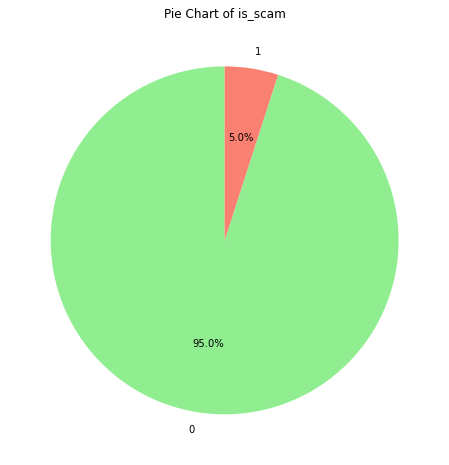

In [20]:
plot_pie_chart(data, 'is_scam')

In [21]:
# Feature Engineering: Extract time-based features
data['transaction_hour'] = data['transaction_datetime'].dt.hour
data['transaction_day'] = data['transaction_datetime'].dt.day
data['transaction_month'] = data['transaction_datetime'].dt.month
data['transaction_year'] = data['transaction_datetime'].dt.year

# Drop the original datetime column if not needed
data = data.drop(columns=['transaction_datetime'])

### Using Word2Vec Embeddings

In [22]:
# pip install gensim

In [23]:
# pip uninstall numpy scipy


In [24]:
# pip install numpy scipy


In [25]:
import numpy as np
import scipy
from gensim.models import Word2Vec

print("Imports successful!")


Imports successful!


In [26]:
from gensim.models import Word2Vec

# Ensure the 'recipient' column is treated as a string
data['recipient'] = data['recipient'].astype(str)

# Train Word2Vec model on recipient column
sentences = data['recipient'].apply(lambda x: x.split('_')).tolist()
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4, seed=42)

KeyError: 'recipient'

In [ ]:
word2vec_model

In [9]:
# Function to convert recipient to Word2Vec vector
def recipient_to_vec(recipient):
    words = recipient.split('_')
    vec = np.mean([word2vec_model.wv[word] for word in words], axis=0)
    return vec

In [18]:
# Apply the function to the recipient column
recipient_vectors = np.array(data['recipient'].apply(recipient_to_vec).tolist())

# Create a DataFrame from recipient vectors
recipient_df = pd.DataFrame(recipient_vectors, columns=[f'w2v_{i}' for i in range(recipient_vectors.shape[1])])

In [19]:
recipient_df

,w2v_0,w2v_1,w2v_2,w2v_3,w2v_4,w2v_5,w2v_6,w2v_7,w2v_8,w2v_9,...,w2v_90,w2v_91,w2v_92,w2v_93,w2v_94,w2v_95,w2v_96,w2v_97,w2v_98,w2v_99
0,0.001222,-0.005137,-0.000202,0.006943,0.001583,-0.009949,-0.000851,-0.008053,0.009739,-0.003237,...,0.002483,-0.009940,0.000641,-0.009569,-0.007797,-0.004852,0.005599,0.009038,-0.008791,-0.000260
1,-0.002419,-0.007626,-0.002003,0.008741,-0.004775,0.007895,-0.004825,-0.006281,-0.004787,-0.003535,...,-0.006237,-0.006061,0.003930,-0.004762,-0.003855,0.002539,-0.003404,-0.002237,-0.005110,-0.003092
2,-0.004518,0.003532,0.008952,0.000354,0.001179,0.006540,-0.008679,0.009625,-0.000483,-0.002438,...,-0.006728,0.003666,0.003369,-0.007140,-0.001324,-0.004233,-0.002053,0.005457,0.001931,0.008155
3,-0.007685,-0.009680,-0.008460,0.000160,-0.006782,0.001876,0.003947,-0.004618,-0.008507,-0.009283,...,0.001902,-0.001551,-0.001432,0.003821,-0.006033,0.008306,-0.005110,0.001527,-0.007479,-0.007661
4,-0.009687,0.001972,0.008225,0.007042,0.002402,-0.000037,0.009636,0.000524,-0.004435,0.003420,...,-0.004634,-0.002815,-0.005731,0.007408,0.004029,-0.003582,0.003328,0.006265,0.004583,-0.003782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.002114,0.000364,0.000198,-0.004675,0.009130,-0.003442,-0.001768,0.008539,0.006351,0.000327,...,0.007158,0.001410,-0.006960,0.005732,-0.005102,-0.007106,0.000959,-0.006888,-0.008754,-0.003098
9996,-0.008470,-0.009662,-0.004839,-0.007583,-0.000987,0.003071,-0.006416,-0.000426,0.005092,0.003801,...,0.008060,0.001201,-0.005268,-0.002475,-0.009401,-0.009150,-0.005957,0.000553,0.009612,0.005508
9997,0.005678,-0.004559,-0.002017,0.004568,0.007733,-0.004726,0.008320,-0.004486,0.001945,-0.008584,...,0.007684,-0.009915,-0.005533,-0.000702,0.003858,-0.001382,0.007477,-0.003012,-0.009485,0.005123
9998,-0.005815,0.005524,-0.005154,-0.007689,-0.001336,-0.008415,0.009590,0.005423,0.000798,-0.002935,...,0.008744,-0.005062,0.004848,0.000188,0.003823,0.001407,0.006322,-0.003608,0.004278,0.003996


In [20]:
# Drop the original 'recipient' column and concatenate the Word2Vec DataFrame
data = data.drop('recipient', axis=1)
data = pd.concat([data.reset_index(drop=True), recipient_df.reset_index(drop=True)], axis=1)

### Using TFIDF

In [21]:
from gensim.models import Word2Vec

# Prepare the data for Word2Vec
messages = data['message'].apply(lambda x: x.split())

# Train a Word2Vec model
word2vec_model = Word2Vec(messages, vector_size=100, window=5, min_count=1, workers=4)

# Function to get the average word vector for a message
def get_avg_word2vec(message):
    words = message.split()
    word_vecs = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
    return np.mean(word_vecs, axis=0) if word_vecs else np.zeros(100)

# Apply the function to get the message vectors
data['message_vector'] = data['message'].apply(get_avg_word2vec)

# Split the message_vector into separate columns
message_vector_df = pd.DataFrame(data['message_vector'].tolist(), index=data.index)

# Concatenate Word2Vec features with the original DataFrame
data = pd.concat([data, message_vector_df], axis=1)

In [22]:
data

,transaction_amount,is_scam,message,transaction_hour,transaction_day,transaction_month,transaction_year,w2v_0,w2v_1,w2v_2,...,90,91,92,93,94,95,96,97,98,99
0,951.21,0,Normal transaction,15,3,1,2023,0.001222,-0.005137,-0.000202,...,-0.062204,0.025208,0.064107,-0.049333,0.133305,0.050383,0.044273,-0.069257,0.022424,-0.043811
1,108.98,0,Normal transaction,15,3,1,2023,-0.002419,-0.007626,-0.002003,...,-0.062204,0.025208,0.064107,-0.049333,0.133305,0.050383,0.044273,-0.069257,0.022424,-0.043811
2,654.38,0,Normal transaction,9,5,1,2023,-0.004518,0.003532,0.008952,...,-0.062204,0.025208,0.064107,-0.049333,0.133305,0.050383,0.044273,-0.069257,0.022424,-0.043811
3,10.77,0,Normal transaction,12,4,1,2023,-0.007685,-0.009680,-0.008460,...,-0.062204,0.025208,0.064107,-0.049333,0.133305,0.050383,0.044273,-0.069257,0.022424,-0.043811
4,17.00,0,Normal transaction,8,1,1,2023,-0.009687,0.001972,0.008225,...,-0.062204,0.025208,0.064107,-0.049333,0.133305,0.050383,0.044273,-0.069257,0.022424,-0.043811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,289.08,0,Normal transaction,16,7,1,2023,-0.002114,0.000364,0.000198,...,-0.062204,0.025208,0.064107,-0.049333,0.133305,0.050383,0.044273,-0.069257,0.022424,-0.043811
9996,252.84,0,Normal transaction,17,3,1,2023,-0.008470,-0.009662,-0.004839,...,-0.062204,0.025208,0.064107,-0.049333,0.133305,0.050383,0.044273,-0.069257,0.022424,-0.043811
9997,572.52,0,Normal transaction,19,7,1,2023,0.005678,-0.004559,-0.002017,...,-0.062204,0.025208,0.064107,-0.049333,0.133305,0.050383,0.044273,-0.069257,0.022424,-0.043811
9998,724.17,0,Normal transaction,17,4,1,2023,-0.005815,0.005524,-0.005154,...,-0.062204,0.025208,0.064107,-0.049333,0.133305,0.050383,0.044273,-0.069257,0.022424,-0.043811


In [23]:
# Drop the original message column and the message_vector column
data = data.drop(columns=['message', 'message_vector'])

In [24]:
# Ensure all column names are strings
data.columns = data.columns.astype(str)

In [25]:
data

,transaction_amount,is_scam,transaction_hour,transaction_day,transaction_month,transaction_year,w2v_0,w2v_1,w2v_2,w2v_3,...,90,91,92,93,94,95,96,97,98,99
0,951.21,0,15,3,1,2023,0.001222,-0.005137,-0.000202,0.006943,...,-0.062204,0.025208,0.064107,-0.049333,0.133305,0.050383,0.044273,-0.069257,0.022424,-0.043811
1,108.98,0,15,3,1,2023,-0.002419,-0.007626,-0.002003,0.008741,...,-0.062204,0.025208,0.064107,-0.049333,0.133305,0.050383,0.044273,-0.069257,0.022424,-0.043811
2,654.38,0,9,5,1,2023,-0.004518,0.003532,0.008952,0.000354,...,-0.062204,0.025208,0.064107,-0.049333,0.133305,0.050383,0.044273,-0.069257,0.022424,-0.043811
3,10.77,0,12,4,1,2023,-0.007685,-0.009680,-0.008460,0.000160,...,-0.062204,0.025208,0.064107,-0.049333,0.133305,0.050383,0.044273,-0.069257,0.022424,-0.043811
4,17.00,0,8,1,1,2023,-0.009687,0.001972,0.008225,0.007042,...,-0.062204,0.025208,0.064107,-0.049333,0.133305,0.050383,0.044273,-0.069257,0.022424,-0.043811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,289.08,0,16,7,1,2023,-0.002114,0.000364,0.000198,-0.004675,...,-0.062204,0.025208,0.064107,-0.049333,0.133305,0.050383,0.044273,-0.069257,0.022424,-0.043811
9996,252.84,0,17,3,1,2023,-0.008470,-0.009662,-0.004839,-0.007583,...,-0.062204,0.025208,0.064107,-0.049333,0.133305,0.050383,0.044273,-0.069257,0.022424,-0.043811
9997,572.52,0,19,7,1,2023,0.005678,-0.004559,-0.002017,0.004568,...,-0.062204,0.025208,0.064107,-0.049333,0.133305,0.050383,0.044273,-0.069257,0.022424,-0.043811
9998,724.17,0,17,4,1,2023,-0.005815,0.005524,-0.005154,-0.007689,...,-0.062204,0.025208,0.064107,-0.049333,0.133305,0.050383,0.044273,-0.069257,0.022424,-0.043811


### Using Synthetic Minority Over-sampling Technique

In [26]:
# pip install imbalanced-learn

In [27]:
data.head()

,transaction_amount,is_scam,transaction_hour,transaction_day,transaction_month,transaction_year,w2v_0,w2v_1,w2v_2,w2v_3,...,90,91,92,93,94,95,96,97,98,99
0,951.21,0,15,3,1,2023,0.001222,-0.005137,-0.000202,0.006943,...,-0.062204,0.025208,0.064107,-0.049333,0.133305,0.050383,0.044273,-0.069257,0.022424,-0.043811
1,108.98,0,15,3,1,2023,-0.002419,-0.007626,-0.002003,0.008741,...,-0.062204,0.025208,0.064107,-0.049333,0.133305,0.050383,0.044273,-0.069257,0.022424,-0.043811
2,654.38,0,9,5,1,2023,-0.004518,0.003532,0.008952,0.000354,...,-0.062204,0.025208,0.064107,-0.049333,0.133305,0.050383,0.044273,-0.069257,0.022424,-0.043811
3,10.77,0,12,4,1,2023,-0.007685,-0.009680,-0.008460,0.000160,...,-0.062204,0.025208,0.064107,-0.049333,0.133305,0.050383,0.044273,-0.069257,0.022424,-0.043811
4,17.00,0,8,1,1,2023,-0.009687,0.001972,0.008225,0.007042,...,-0.062204,0.025208,0.064107,-0.049333,0.133305,0.050383,0.044273,-0.069257,0.022424,-0.043811


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 206 entries, transaction_amount to 99
dtypes: float32(200), float64(1), int32(1), int64(4)
memory usage: 8.0 MB


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Define features (X) and target (y)
X = data
y = data['is_scam']

In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 206 entries, transaction_amount to 99
dtypes: float32(200), float64(1), int32(1), int64(4)
memory usage: 8.0 MB


In [31]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: is_scam
Non-Null Count  Dtype
--------------  -----
10000 non-null  int32
dtypes: int32(1)
memory usage: 39.2 KB


In [32]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Scale the features
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [33]:
# Scaling the features
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [34]:
# Create DataFrames for the resampled training data
X_train_resampled_df = pd.DataFrame(X_train_resampled, columns=X_train.columns)
y_train_resampled_df = pd.DataFrame(y_train_resampled, columns=['is_scam'])

# Verify the resampling result
before_smote = y_train.value_counts().rename_axis('class').reset_index(name='count')
after_smote = pd.Series(y_train_resampled).value_counts().rename_axis('class').reset_index(name='count')

print("Class distribution before SMOTE:\n", before_smote)
print("Class distribution after SMote:\n", after_smote)

Class distribution before SMOTE:
    class  count
0      0   7602
1      1    398
Class distribution after SMote:
    class  count
0      0   7602
1      1   7602


In [35]:
y_train_resampled_df

,is_scam
0,0
1,0
2,0
3,0
4,0
...,...
15199,1
15200,1
15201,1
15202,1


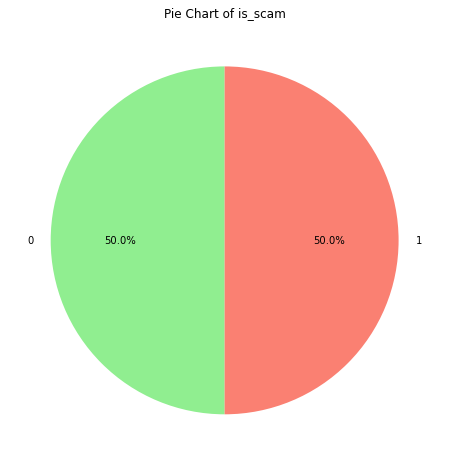

In [36]:
plot_pie_chart(y_train_resampled_df, 'is_scam')

In [37]:
X_train_resampled_df

,transaction_amount,is_scam,transaction_hour,transaction_day,transaction_month,transaction_year,w2v_0,w2v_1,w2v_2,w2v_3,...,90,91,92,93,94,95,96,97,98,99
0,436.720000,0,12,3,1,2023,-0.004099,0.004902,0.004461,0.000410,...,-0.062204,0.025208,0.064107,-0.049333,0.133305,0.050383,0.044273,-0.069257,0.022424,-0.043811
1,105.850000,0,15,2,1,2023,-0.002838,0.007528,0.006728,0.002992,...,-0.062204,0.025208,0.064107,-0.049333,0.133305,0.050383,0.044273,-0.069257,0.022424,-0.043811
2,41.130000,0,9,5,1,2023,0.008179,-0.001141,-0.009317,-0.003025,...,-0.062204,0.025208,0.064107,-0.049333,0.133305,0.050383,0.044273,-0.069257,0.022424,-0.043811
3,164.040000,0,15,2,1,2023,-0.009915,-0.003349,-0.009905,0.003417,...,-0.062204,0.025208,0.064107,-0.049333,0.133305,0.050383,0.044273,-0.069257,0.022424,-0.043811
4,963.710000,0,8,4,1,2023,0.005781,-0.005569,0.005079,0.000157,...,-0.062204,0.025208,0.064107,-0.049333,0.133305,0.050383,0.044273,-0.069257,0.022424,-0.043811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15199,2947.819870,1,15,1,1,2023,-0.009530,-0.005578,0.005946,-0.000489,...,-0.145840,0.059910,0.141254,-0.101850,0.303460,0.108006,0.100317,-0.150786,0.064586,-0.111927
15200,3169.721594,1,13,1,1,2023,0.001619,-0.001984,-0.000936,0.000477,...,-0.145840,0.059910,0.141254,-0.101850,0.303460,0.108006,0.100317,-0.150786,0.064586,-0.111927
15201,1276.799346,1,13,5,1,2023,0.002255,-0.009140,0.001824,0.005841,...,-0.145840,0.059910,0.141254,-0.101850,0.303460,0.108006,0.100317,-0.150786,0.064586,-0.111927
15202,4019.964564,1,19,7,1,2023,-0.008206,0.006025,-0.000087,-0.001115,...,-0.145840,0.059910,0.141254,-0.101850,0.303460,0.108006,0.100317,-0.150786,0.064586,-0.111927


In [38]:
# Convert categorical 'recipient' column to numeric using one-hot encoding
# data = pd.get_dummies(data, columns=['recipient'], drop_first=True)

# Features and target variable
X = data.drop('is_scam', axis=1)
y = data['is_scam']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
ROC AUC Score: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1901
           1       1.00      1.00      1.00        99

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [40]:
import streamlit as st

# Function to make predictions
def predict_scam(transaction_amount, transaction_hour, transaction_day, recipient):
    recipient_columns = [col for col in X.columns if col.startswith('recipient_')]
    recipient_data = np.zeros(len(recipient_columns))
    recipient_col_name = f'recipient_{recipient}'
    
    if recipient_col_name in recipient_columns:
        recipient_index = recipient_columns.index(recipient_col_name)
        recipient_data[recipient_index] = 1

    input_data = np.array([[transaction_amount, transaction_hour, transaction_day] + list(recipient_data)])
    input_data_scaled = scaler.transform(input_data)
    prediction = model.predict(input_data_scaled)
    probability = model.predict_proba(input_data_scaled)[:, 1]
    return prediction[0], probability[0]

# Streamlit app
st.title("Scam Detection System")

st.header("Enter Transaction Details")
transaction_amount = st.number_input("Transaction Amount")
transaction_hour = st.number_input("Transaction Hour", min_value=0, max_value=23)
transaction_day = st.number_input("Transaction Day of the Week", min_value=0, max_value=6)
recipient = st.text_input("Recipient")

if st.button("Predict"):
    prediction, probability = predict_scam(transaction_amount, transaction_hour, transaction_day, recipient)
    if prediction == 1:
        st.error(f"The transaction is predicted to be a scam with a probability of {probability:.2f}")
    else:
        st.success(f"The transaction is predicted to be legitimate with a probability of {probability:.2f}")

# Run the Streamlit app with: streamlit run your_script.py


2024-05-31 02:45:12.359 
  command:

    streamlit run C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [41]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: neuralplot 0.0.8 has a non-standard dependency specifier matplotlib>=3.1numpy>=1.16. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of neuralplot or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [44]:
import joblib

# Save the model to a file
joblib.dump(model, 'decision_tree_model.pkl')

# Save the scaler to a file
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [47]:
import streamlit as st
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import joblib

# Load the model, scaler, and any other necessary objects
model = joblib.load('decision_tree_model.pkl')
scaler = joblib.load('scaler.pkl')

# Example feature names based on your dataset
feature_names = ['transaction_amount', 'transaction_hour', 'transaction_day', 'transaction_month', 'transaction_year']

# Function to preprocess input data
def preprocess_input(transaction_amount, transaction_datetime):
    # Extract time-based features
    transaction_hour = transaction_datetime.hour
    transaction_day = transaction_datetime.day
    transaction_month = transaction_datetime.month
    transaction_year = transaction_datetime.year
    
    # Combine all features into a single input array
    input_data = np.array([[transaction_amount, transaction_hour, transaction_day, transaction_month, transaction_year]])
    
    # Scale the features (using the scaler fitted on training data)
    input_data_scaled = scaler.transform(input_data)
    
    return input_data_scaled

# Function to make predictions
def predict_scam(transaction_amount, transaction_datetime):
    input_data_scaled = preprocess_input(transaction_amount, transaction_datetime)
    prediction = model.predict(input_data_scaled)
    probability = model.predict_proba(input_data_scaled)[:, 1]
    return prediction[0], probability[0]

# Streamlit app
st.title("Scam Detection System")

st.header("Enter Transaction Details")
transaction_amount = st.number_input("Transaction Amount")
transaction_datetime = st.text_input("Transaction DateTime (YYYY-MM-DD HH:MM:SS)")
if transaction_datetime:
    transaction_datetime = pd.to_datetime(transaction_datetime)

if st.button("Predict"):
    prediction, probability = predict_scam(transaction_amount, transaction_datetime)
    if prediction == 1:
        st.error(f"The transaction is predicted to be a scam with a probability of {probability:.2f}")
    else:
        st.success(f"The transaction is predicted to be legitimate with a probability of {probability:.2f}")
